# r.earthworks
This notebook demonstrates the tests for r.earthworks.

## Setup
Start a GRASS session in the North Carolina basic sample dataset.

In [7]:
import os
import json
import subprocess
import sys

# ask GRASS GIS where its Python packages are
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# import GRASS packages
import grass.script as gs
import grass.jupyter as gj

# start GRASS session
session = gj.init("~/grassdata/nc_basic_spm_grass7/user1")

## Install
Install the addon.

In [8]:
# install addon
gs.run_command(
    "g.extension",
    extension="r.earthworks",
    url="https://github.com/baharmon/r.earthworks"
)

## Testing
Set the computational region and generate a flat terrain with map algebra.

In [9]:
# setup
gs.run_command('g.region', n=10, e=10, s=0, w=0, res=1)
gs.mapcalc('test_input = 0')

### Fill Operation
Model a peak with a fill operation.

fill operation


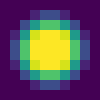

In [10]:

# test fill
gs.run_command(
    'r.earthworks',
    elevation='test_input',
    earthworks='test_output',
    coordinates=[5,5],
    operation='fill',
    z=1,
    flat=2,
    rate=0.5
)
print('fill operation')

# visualize
m = gj.Map(width=100)
m.d_rast(map="test_output")
m.show()

### Cut Operation
Model a peak with a fill operation.

cut operation


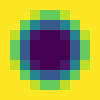

In [11]:
# test cut
gs.run_command(
    'r.earthworks',
    elevation='test_input',
    earthworks='test_output',
    coordinates=[5,5],
    operation='cut',
    z=-1,
    flat=2,
    rate=0.5
)
print('cut operation')

# visualize
m = gj.Map(width=100)
m.d_rast(map="test_output")
m.show()

### Cut & Fill Operation
Model a pit and a peak with a cut-fill operation.

cut & fill operation


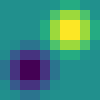

In [12]:
# test cut & fill
gs.run_command(
    'r.earthworks',
    elevation='test_input',
    earthworks='test_output',
    coordinates=[3,3,7,7],
    operation='cutfill',
    z=[-1,1],
    flat=1,
    rate=0.5
)
print('cut & fill operation')

# visualize
m = gj.Map(width=100)
m.d_rast(map="test_output")
m.show()